In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# 1. Import Data

### 1.1 UFO Data

In [3]:
df_ufo = pd.read_csv('Resources/ufo_data.csv', on_bad_lines='skip', low_memory=False)
df_ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
df_ufo[['date','time']] = df_ufo['datetime'].str.split(expand=True)
df_ufo['datetime'] = (pd.to_datetime(df_ufo.pop('date'), format='%m/%d/%Y') + 
                  pd.to_timedelta(df_ufo.pop('time') + ':00'))

In [5]:
df_ufo['ufo'] = 1
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              88679 non-null  datetime64[ns]
 1   city                  88679 non-null  object        
 2   state                 81270 non-null  object        
 3   country               76314 non-null  object        
 4   shape                 85757 non-null  object        
 5   duration (seconds)    88677 non-null  object        
 6   duration (hours/min)  85660 non-null  object        
 7   comments              88644 non-null  object        
 8   date posted           88679 non-null  object        
 9   latitude              88679 non-null  object        
 10  longitude             88679 non-null  float64       
 11  ufo                   88679 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 8.1+ M

In [6]:
df_ufo['year'] = pd.DatetimeIndex(df_ufo['datetime']).year
df_ufo['ufo'] = 1
df_ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,ufo,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1,1949
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1,1949
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1,1955
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1,1960


In [7]:
df_ufo_2 = df_ufo[['year', 'ufo']]
print(df_ufo_2.shape)

(88679, 2)


In [8]:
df_ufo_2['year'].describe()

count    88679.000000
mean      2003.651564
std         10.599764
min       1906.000000
25%       2001.000000
50%       2006.000000
75%       2011.000000
max       2014.000000
Name: year, dtype: float64

### 1.2 Meteorite Data

In [9]:
df_meteorite = pd.read_json('Resources/Meteorite_Landings.json')
df_meteorite.head()

,name,id,recclass,mass (g),year,latitude,longitude,Address
0,Allegan,2276,H5,32000.0,1899,42.53333,-85.88333,"1596 34th St, Allegan, MI 49010, USA"
1,Andover,2295,L6,3200.0,1898,44.61667,-70.75000,"J782+M2 Andover, ME, USA"
2,Archie,2329,H6,5070.0,1932,38.50000,-94.30000,"33900 S Dickey Rd, Archie, MO 64725, USA"
3,Ash Creek,48954,L6,9500.0,2009,31.80500,-97.01000,"RX4R+22 Cottonwood, TX, USA"
4,Athens,4885,LL6,265.0,1933,34.75000,-87.00000,"Q222+22 Athens, AL, USA"


In [10]:
#some rows have missing year values, they need to be dropped
df_meteorite_2 = df_meteorite.dropna()

In [11]:
df_meteorite_2 = df_meteorite_2.astype({'year': int}, errors='raise')
df_meteorite_2['meteorite'] = 1
df_meteorite_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       144 non-null    object 
 1   id         144 non-null    int64  
 2   recclass   144 non-null    object 
 3   mass (g)   144 non-null    float64
 4   year       144 non-null    int64  
 5   latitude   144 non-null    float64
 6   longitude  144 non-null    float64
 7   Address    144 non-null    object 
 8   meteorite  144 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [12]:
df_meteorite_3 = df_meteorite_2[['year', 'meteorite']]
print(df_meteorite_3.shape)

(144, 2)


In [13]:
df_meteorite_3['year'].describe()

count     144.000000
mean     1922.680556
std        50.917272
min      1807.000000
25%      1890.000000
50%      1925.000000
75%      1956.750000
max      2012.000000
Name: year, dtype: float64

In [14]:
#restrict date range to 1900 - 2023
df_meteorite_4 = df_meteorite_3.loc[(df_meteorite_3['year']>=1900)&(df_meteorite_3['year']<=2023)]
print(df_meteorite_4.shape)

(99, 2)


### 1.3 Fireball Data

In [15]:
df_fireball = pd.read_csv('Resources/Longer_Fireball_Data.csv')
df_fireball.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086
1,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095
2,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100
3,2023-03-03 02:53:54,40.1N,87.4E,32.0,25.3,16.1,-19.3,2.6,6.400000e+10,0.200
4,2023-02-19 06:15:34,7.9N,109.9E,37.0,23.0,-1.1,-22.9,1.2,2.030000e+11,0.570


In [16]:
df_fireball['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df_fireball['Peak Brightness Date/Time (UT)'])
df_fireball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Peak Brightness Date/Time (UT)       951 non-null    datetime64[ns]
 1   Latitude (deg.)                      761 non-null    object        
 2   Longitude (deg.)                     761 non-null    object        
 3   Altitude (km)                        493 non-null    float64       
 4   Velocity (km/s)                      288 non-null    float64       
 5   vx                                   288 non-null    float64       
 6   vy                                   288 non-null    float64       
 7   vz                                   288 non-null    float64       
 8   Total Radiated Energy (J)            951 non-null    float64       
 9   Calculated Total Impact Energy (kt)  951 non-null    float64       
dtypes: datetime64[

In [17]:
df_fireball['year'] = pd.DatetimeIndex(df_fireball['Peak Brightness Date/Time (UT)']).year
df_fireball['fireball'] = 1
df_fireball.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),year,fireball
0,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086,2023,1
1,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095,2023,1
2,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100,2023,1
3,2023-03-03 02:53:54,40.1N,87.4E,32.0,25.3,16.1,-19.3,2.6,6.400000e+10,0.200,2023,1
4,2023-02-19 06:15:34,7.9N,109.9E,37.0,23.0,-1.1,-22.9,1.2,2.030000e+11,0.570,2023,1


In [18]:
df_fireball_2 = df_fireball[['year', 'fireball']]
print(df_fireball_2.shape)

(951, 2)


In [19]:
df_fireball_2['year'].describe()

count     951.000000
mean     2009.319664
std         8.212623
min      1988.000000
25%      2003.000000
50%      2009.000000
75%      2016.000000
max      2023.000000
Name: year, dtype: float64

# 2. Create Year Array (1900 - 2023)

In [20]:
years = []
x = 1900
while x < 2024:
    years.append(x)
    x +=1

In [21]:
df_years = pd.DataFrame(years)
df_years = df_years.rename(columns={0:'year'})
df_years.head()

,year
0,1900
1,1901
2,1902
3,1903
4,1904


# 3. Sighting Counts by Year

### 3.1 UFO

In [22]:
df_ufo_by_year = df_ufo_2.groupby('year').sum().reset_index()
df_ufo_by_year = df_ufo_by_year.sort_values('year', ascending = True)
df_ufo_by_year.head()

,year,ufo
0,1906,1
1,1910,3
2,1914,1
3,1916,1
4,1917,1


In [23]:
df_ufo_by_year = df_ufo_by_year.rename(columns={'ufo':'ufo_sightings'})

### 3.2 Meteorite

In [24]:
df_meteorite_by_year = df_meteorite_4.groupby('year').sum().reset_index()
df_meteorite_by_year = df_meteorite_by_year.sort_values('year', ascending = True)
df_meteorite_by_year.head()

,year,meteorite
0,1900,1
1,1902,1
2,1903,1
3,1905,1
4,1906,2


In [25]:
df_meteorite_by_year = df_meteorite_by_year.rename(columns={'meteorite':'meteorite_sightings'})

### 3.3 Fireball

In [26]:
df_fireball_by_year = df_fireball_2.groupby('year').sum().reset_index()
df_fireball_by_year = df_fireball_by_year.sort_values('year', ascending = True)
df_fireball_by_year.head()

,year,fireball
0,1988,1
1,1990,1
2,1991,1
3,1993,2
4,1994,13


In [27]:
df_fireball_by_year = df_fireball_by_year.rename(columns={'fireball':'fireball_sightings'})

# 4. Join to Years

In [28]:
df_all = pd.merge(df_years, df_ufo_by_year, how='left')
df_all = pd.merge(df_all, df_meteorite_by_year, how='left')
df_all = pd.merge(df_all, df_fireball_by_year, how='left')
df_all.head()

,year,ufo_sightings,meteorite_sightings,fireball_sightings
0,1900,NaN,1.0,NaN
1,1901,NaN,NaN,NaN
2,1902,NaN,1.0,NaN
3,1903,NaN,1.0,NaN
4,1904,NaN,NaN,NaN


In [29]:
df_all['ufo_sightings'] = np.where(df_all['ufo_sightings'].isna(), 0, df_all['ufo_sightings'])
df_all['meteorite_sightings'] = np.where(df_all['meteorite_sightings'].isna(), 0, df_all['meteorite_sightings'])
df_all['fireball_sightings'] = np.where(df_all['fireball_sightings'].isna(), 0, df_all['fireball_sightings'])
df_all.head()

,year,ufo_sightings,meteorite_sightings,fireball_sightings
0,1900,0.0,1.0,0.0
1,1901,0.0,0.0,0.0
2,1902,0.0,1.0,0.0
3,1903,0.0,1.0,0.0
4,1904,0.0,0.0,0.0


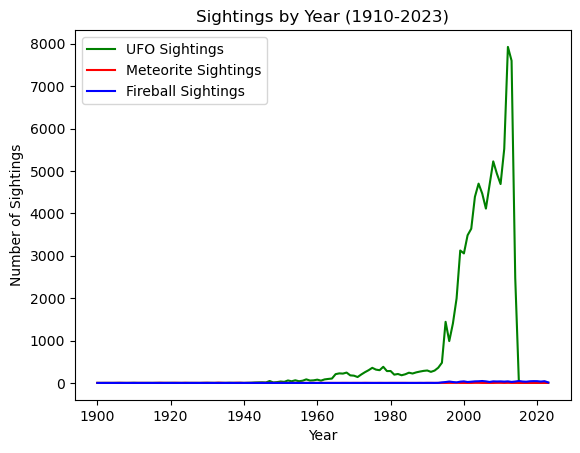

In [30]:
plt.plot(df_all['year'], df_all['ufo_sightings'], color="green", label='UFO Sightings')
plt.plot(df_all['year'], df_all['meteorite_sightings'], color="red", label='Meteorite Sightings')
plt.plot(df_all['year'], df_all['fireball_sightings'], color="blue", label='Fireball Sightings')

plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Sightings by Year (1910-2023)')

plt.legend()
plt.show()

In [31]:
df_all.to_json('Website/Resources/sightings_by_year.json', orient='index')